# Preprocessing
Run everything starting from here until the next section.

In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
os.listdir()

['properties.txt',
 'explore.ipynb',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'plots',
 'positive_vader.png',
 'soc-redditHyperlinks-body.tsv']

In [3]:
df = pd.read_csv('soc-redditHyperlinks-body.tsv', sep='\t')

In [4]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [5]:
properties = []
with open('properties.txt') as fp:
    line = fp.readline()
    line = fp.readline()
    while line and len(line) > 0:
        line = fp.readline()
        properties.append(line[3:-1])
        
propsDf = df["PROPERTIES"].str.split(",", expand=True) 
for i in range(len(properties)):
    prop = properties[i]
    df[prop] = propsDf[i].astype("float64")
df.drop(columns="PROPERTIES",inplace=True)

In [6]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


# Data Visualization (Plots)

In [10]:
source_freq = [dict(df["SOURCE_SUBREDDIT"].value_counts())[x] for x in dict(df["SOURCE_SUBREDDIT"].value_counts())]

KeyboardInterrupt: 

In [ ]:
# plt.hist(df["SOURCE_SUBREDDIT"])

In [14]:
### Code to generate histograms for distribution visualization
# hist_columns = [' Negative sentiment calculated by VADER',
#                 ' Positive sentiment calculated by VADER',
#                 ' Compound sentiment calculated by VADER',
#                ' Average word length',
#                'Number of words',
#                'Number of unique works',
#                ' Average number of characters per sentence']
# filenames = ['negative_vader','positive_vader','compound_vader',
#              'average_word_length','num_words','num_unique_words',
#             'average_chars_per_sentence']
# for i in range (len(hist_columns)):
#     filename = filenames[i]
#     plt.hist(df[hist_columns[i]],bins=10000)
#     plt.title(hist_columns[i][1:])
#     plt.savefig("plots/"+filename+".png")
#     plt.show()

In [20]:
# plt.hist(df[' Positive sentiment calculated by VADER'],bins=10000)
# plt.savefig("plots/positive_vader.png")
# plt.show()

# Graphs

In [78]:
G=nx.from_pandas_edgelist(df, 
                          source='SOURCE_SUBREDDIT', 
                          target='TARGET_SUBREDDIT',
                          create_using=nx.DiGraph())

In [69]:
pageranks = nx.pagerank(G)

In [70]:
np.mean([pageranks[rank] for rank in pageranks])

2.7951699463327364e-05

In [71]:
# closeness_centrality = nx.closeness_centrality(G)

In [72]:
left_eig = nx.algorithms.centrality.eigenvector_centrality(G)

In [74]:
np.mean([left_eig[rank] for rank in left_eig])

0.001285459760708005

In [80]:
degree_centrality = nx.degree_centrality(G)
np.mean([degree_centrality[rank] for rank in degree_centrality])

0.00021536442609281571

In [79]:
in_degree_centrality = nx.in_degree_centrality(G)
np.mean([degree_centrality[rank] for rank in in_degree_centrality])

0.0001942828676044999

In [81]:
out_degree_centrality = nx.out_degree_centrality(G)
np.mean([degree_centrality[rank] for rank in in_degree_centrality])

0.00021536442609281571

In [ ]:
# betweenness_centrality = nx.betweenness_centrality(G)

In [51]:
top_count = 15
source_vc = dict(df["SOURCE_SUBREDDIT"].value_counts())
target_vc = df["TARGET_SUBREDDIT"].value_counts()
top_sources = sorted([(sub,source_vc[sub]) for sub in source_vc],reverse=True,key=lambda x: x[1])[:top_count]
top_targets = sorted([(sub,target_vc[sub]) for sub in target_vc],key=lambda x: x[1])[:top_count]

In [47]:
top_sources_names = [t[0] for t in top_sources]
top_targets_names = [t[0] for t in top_sources]
filtered_df = df[df["SOURCE_SUBREDDIT"].isin(top_sources_names)][df["TARGET_SUBREDDIT"].isin(top_targets_names)]

/Users/lucyzhang/anaconda3/envs/18065_env/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
len(filtered_df)

1985

In [50]:
G_filtered = nx.from_pandas_edgelist(filtered_df, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT')

In [60]:
filtered_df["SOURCE_SUBREDDIT"].describe()

count             1985
unique              15
top       outoftheloop
freq               264
Name: SOURCE_SUBREDDIT, dtype: object

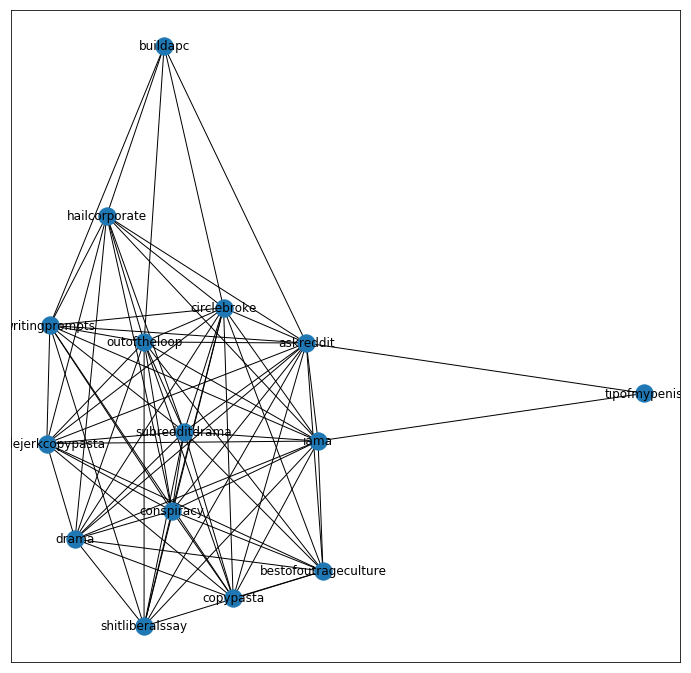

In [61]:
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx(G_filtered,arrows=True)
# nx.draw_networkx_labels(G, pos[, labels, …])



# Linear Regression

In [62]:
# pip install sklearn
from sklearn.preprocessing import OneHotEncoder, normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier


In [9]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [10]:
df.shape

(286561, 91)

In [12]:
df.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'Number of characters without counting white space',
       'Fraction of alphabetical characters', 'Fraction of digits',
       'Fraction of uppercase characters', 'Fraction of white spaces',
       'Fraction of special characters, such as comma, exclamation mark, etc.',
       'Number of words', 'Number of unique works',
       ' Number of long words (at least 6 characters)', ' Average word length',
       ' Number of unique stopwords', ' Fraction of stopwords',
       ' Number of sentences', ' Number of long sentences (at least 10 words)',
       ' Average number of characters per sentence',
       ' Average number of words per sentence', ' Automated readability index',
       ' Positive sentiment calculated by VADER',
       ' Negative sentiment calculated by VADER',
       ' Compound sentiment calculated by VADER', ' LIWC_Funct',
       ' LIWC_Pronoun', ' LIWC_Ppron', ' LIWC_I', ' LIWC_W

In [19]:
predict_column = ["LINK_SENTIMENT"]
non_train_columns = ["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "POST_ID", "TIMESTAMP"] + predict_column
train_columns = [col for col in df.columns if col not in non_train_columns]


In [55]:
reg = LinearRegression(normalize=True)
X = np.array(df[train_columns])
# y = np.array(df[predict_column])
y = np.squeeze(np.array(df[predict_column]))
y = np.where(y<0, 0,y)
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [56]:
print(reg.score(X,y))
ypreds = reg.predict(X)
print(mse(y,ypreds))

0.07091516235503859
0.06329006525145547


In [57]:
ypreds

array([1.00688529, 0.94916892, 0.92195916, ..., 0.88986015, 0.94231248,
       0.89424777])

array([1, 0, 1, ..., 1, 1, 1])

In [63]:
reg = LogisticRegression(max_iter=1000)
X = np.array(df[train_columns])
X = normalize(X)
y = np.squeeze(np.array(df[predict_column]))
y = np.where(y<0, 0,y) # change all -1s to 0s
reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
print(reg.score(X,y))
ypreds = reg.predict(X)
print(mse(y,ypreds))

0.9264728975680571
0.07352710243194294


In [66]:
tree = DecisionTreeClassifier()
X = np.array(df[train_columns])
y = np.squeeze(np.array(df[predict_column]))
tree.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
print(tree.score(X,y))
ypreds = tree.predict(X)
print(mse(y,ypreds))

0.9970582179710428
0.01176712811582874


In [60]:
one_hot_columns = ["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"]

In [11]:
source_enc = OneHotEncoder()
source = source_enc.fit_transform(np.array(df["SOURCE_SUBREDDIT"]).reshape(-1,1)).toarray()
sourceOneHot = pd.DataFrame(source, 
                            columns = ["SOURCE_SUBREDDIT_"+str(i) for i in range(source.shape[1])]
                           )

target_enc = OneHotEncoder()
target = target_enc.fit_transform(np.array(df["TARGET_SUBREDDIT"]).reshape(-1,1)).toarray()
targetOneHot = pd.DataFrame(target, 
                            columns = ["TARGET_SUBREDDIT"+str(i) for i in range(target.shape[1])]
                           )


In [12]:
d2 = target.shape[1]+source.shape[1]+df.shape[1]
bigDf = np.empty((target.shape[0], d2))


In [ ]:
# np.concatenate([df, source, target], axis=1)
target_shape = target.shape
source_shape = source.shape

bigDf[:,:target_shape[1]] = target
del target
bigDf[:,target_shape[1]:target_shape[1]+source_shape[1]] = source
del source
bigDf[:,target_shape[1]+source_shape[1]:] = df


In [41]:
target.shape

(286561, 20606)

In [20]:
df_columns = df.columns

In [25]:
dfNp = df.to_numpy(copy=True)

In [23]:
source.shape

(286561, 27863)

In [22]:
dfNp.shape

(286561, 91)

In [ ]:
df

In [ ]:
df = pd.concat([df, sourceOneHot], axis=1)

In [ ]:
df.head()